In [1]:
%load_ext Cython

In [2]:
%matplotlib nbagg

In [3]:
import numpy

Iso contour implementation using Cython with a insertion algorithm to merge polygons together.

The image is split into several blocks to find local iso contours. The result is finally merge all together. This way allow a full OpenMP optimization.

The iso contour from each block is extracted line by line using an array to store intermediate polygons. Polygons connected to the border of the block are stored into a map to be able to merge it in the further process.

MarchingSquareCythonScanInsertOpenMp
================================

In [1]:
import pyximport
_ = pyximport.install()

In [2]:
from impl.MarchingSquareCythonScanInsertOpenMp import MarchingSquareCythonScanInsertOpenMp
ThisMarchingSquare = MarchingSquareCythonScanInsertOpenMp

In [6]:
%%cython --cplus --compile-args=-fopenmp --link-args=-fopenmp --force -a

# Place holder for inlining the cython code

# ThisMarchingSquare = MarchingSquareCythonScanInsertOpenMp

Utils
=====

In [7]:
from impl.MarchingSquareCythonInsertOpenMp import MarchingSquareCythonInsertOpenMp

In [8]:
from impl.MarchingSquareSciKitImage import MarchingSquareSciKitImage

In [9]:
from impl.MarchingSquareCythonArrayOpt import MarchingSquareCythonArrayOpt

In [10]:
try:
    import importlib
    importlib.reload(benchmark_utils)
except Exception as e:
    print(e)
import benchmark_utils

name 'benchmark_utils' is not defined


In [11]:
def show_test_mask(problem):
    from matplotlib import pyplot
    pyplot.figure()
    pyplot.subplot("121")
    pyplot.title("With mask")
    marching_square = ThisMarchingSquare(problem.image, problem.mask)
    benchmark_utils.imshow_problem(problem, marching_square)
    pyplot.subplot("122")
    pyplot.title("Without mask")
    marching_square = ThisMarchingSquare(problem.image)
    benchmark_utils.imshow_problem(problem, marching_square)
    pyplot.show()

In [12]:
def show_test(data, value=0.5, algo=None):
    from matplotlib import pyplot
    if algo is None:
        this_algo = ThisMarchingSquare(image)
    else:
        this_algo = algo
    skimage_algo = MarchingSquareSciKitImage(image)

    polygons = this_algo.iso_contour(value=value)
    print("This algo")
    print(polygons)

    polygons = skimage_algo.iso_contour(value=value)
    print("Skimage")
    print(polygons)

    problem = benchmark_utils.Problem(image, values=[value])

    pyplot.figure()
    pyplot.subplot("121")
    pyplot.title("This algo")
    benchmark_utils.imshow_problem(problem, this_algo)
    pyplot.subplot("122")
    pyplot.title("skimage")
    benchmark_utils.imshow_problem(problem, skimage_algo)
    pyplot.show()

Test
====

This algo
[array([[0.5, 0. ],
       [0.5, 1. ],
       [0.5, 2. ]], dtype=float32)]
Skimage
[array([[0.5, 2. ],
       [0.5, 1. ],
       [0.5, 0. ]])]


<IPython.core.display.Javascript object>


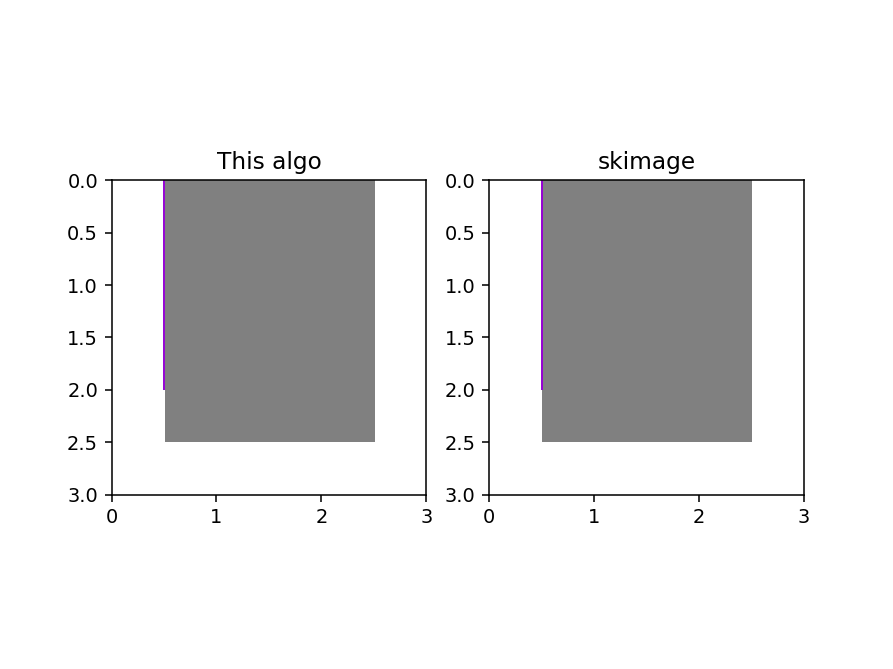

In [13]:
# Append points vertically
image = numpy.array([[0, 1, 1],
                     [0, 1, 1],
                     [0, 1, 1]],dtype=numpy.float32)

show_test(image)

This algo
[array([[2. , 0.5],
       [1. , 0.5],
       [0. , 0.5]], dtype=float32)]
Skimage
[array([[0. , 0.5],
       [1. , 0.5],
       [2. , 0.5]])]


<IPython.core.display.Javascript object>


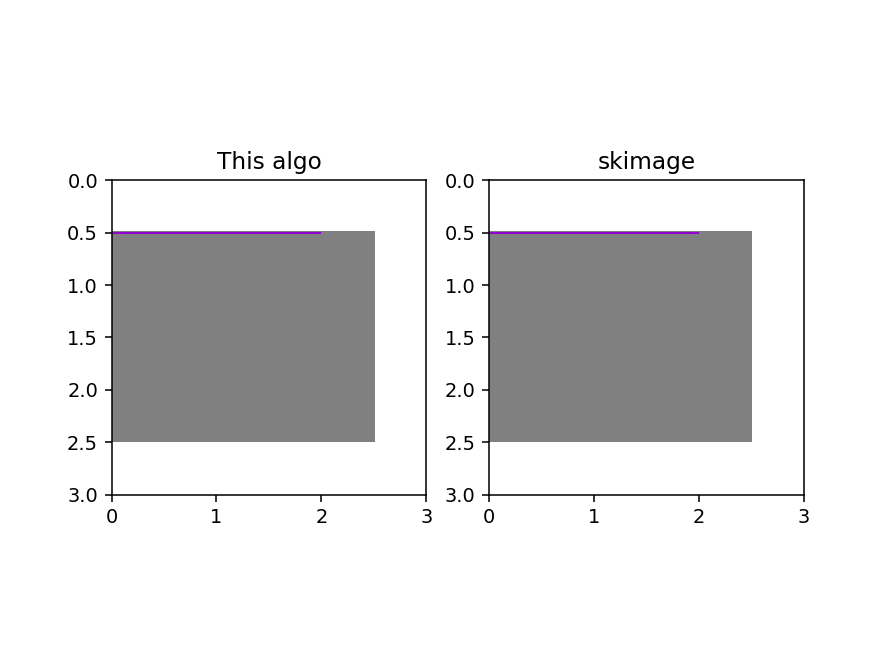

In [14]:
# Append points horizontally
image = numpy.array([[0, 0, 0],
                     [1, 1, 1],
                     [1, 1, 1]],dtype=numpy.float32)
show_test(image)

This algo
[array([[1.5, 0. ],
       [1.5, 1. ],
       [1. , 1.5],
       [0. , 1.5]], dtype=float32)]
Skimage
[array([[1.5, 0. ],
       [1.5, 1. ],
       [1. , 1.5],
       [0. , 1.5]])]


<IPython.core.display.Javascript object>


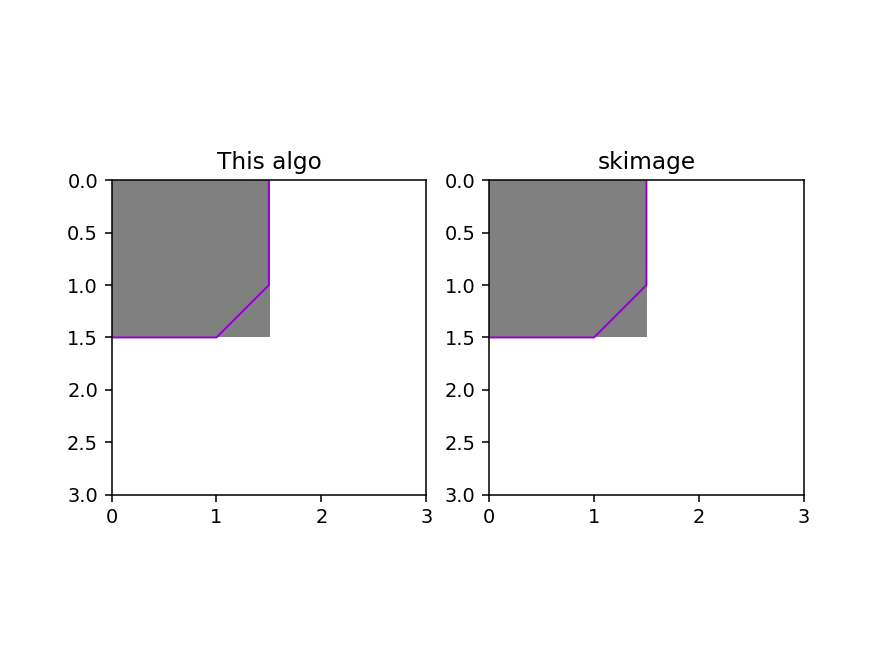

In [15]:
# Merge left and right polygons
image = numpy.array([[1, 1, 0],
                     [1, 1, 0],
                     [0, 0, 0]],dtype=numpy.float32)
show_test(image)

This algo
[array([[0.5, 0. ],
       [0. , 0.5]], dtype=float32), array([[2.5, 0. ],
       [3. , 0.5],
       [3.5, 1. ],
       [3. , 1.5],
       [2.5, 2. ],
       [2. , 2.5],
       [1.5, 2. ],
       [1. , 1.5],
       [0. , 1.5]], dtype=float32)]
Skimage
[array([[0. , 0.5],
       [0.5, 0. ]]), array([[2.5, 0. ],
       [3. , 0.5],
       [3.5, 1. ],
       [3. , 1.5],
       [2.5, 2. ],
       [2. , 2.5],
       [1.5, 2. ],
       [1. , 1.5],
       [0. , 1.5]])]


<IPython.core.display.Javascript object>


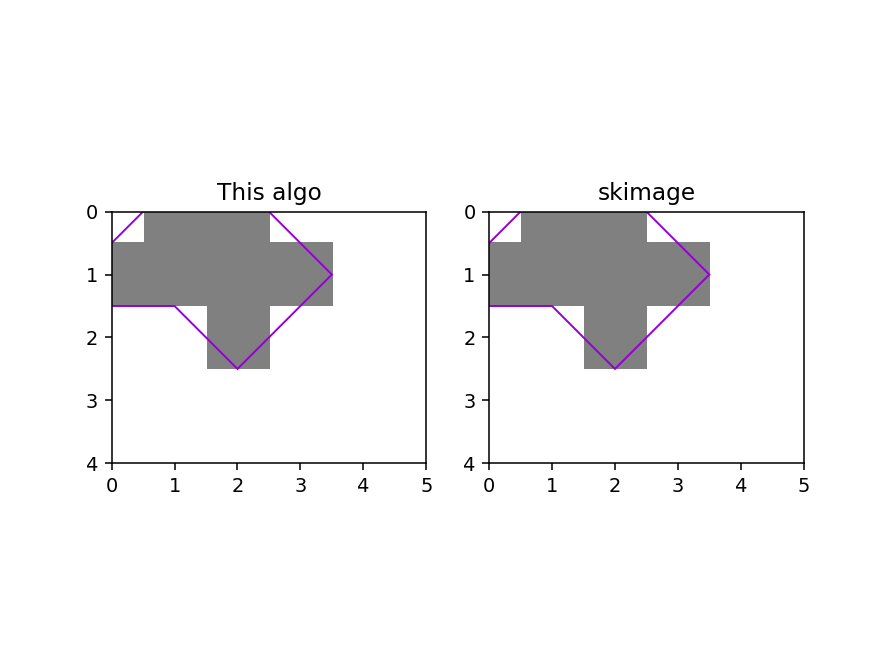

In [16]:
# Merge left and right polygons
image = numpy.array([[0, 1, 1, 0, 0],
                     [1, 1, 1, 1, 0],
                     [0, 0, 1, 0, 0],
                     [0, 0, 0, 0, 0]],dtype=numpy.float32)
show_test(image)

This algo
[array([[2.5, 3. ],
       [3. , 2.5],
       [4. , 2.5],
       [4.5, 2. ],
       [4. , 1.5],
       [3.5, 1. ],
       [3. , 0.5],
       [2. , 0.5],
       [1.5, 1. ],
       [1. , 1.5],
       [0.5, 2. ],
       [1. , 2.5],
       [1.5, 3. ],
       [2. , 3.5],
       [2.5, 3. ]], dtype=float32)]
Skimage
[array([[2. , 3.5],
       [1.5, 3. ],
       [1. , 2.5],
       [0.5, 2. ],
       [1. , 1.5],
       [1.5, 1. ],
       [2. , 0.5],
       [3. , 0.5],
       [3.5, 1. ],
       [4. , 1.5],
       [4.5, 2. ],
       [4. , 2.5],
       [3. , 2.5],
       [2.5, 3. ],
       [2. , 3.5]])]


<IPython.core.display.Javascript object>


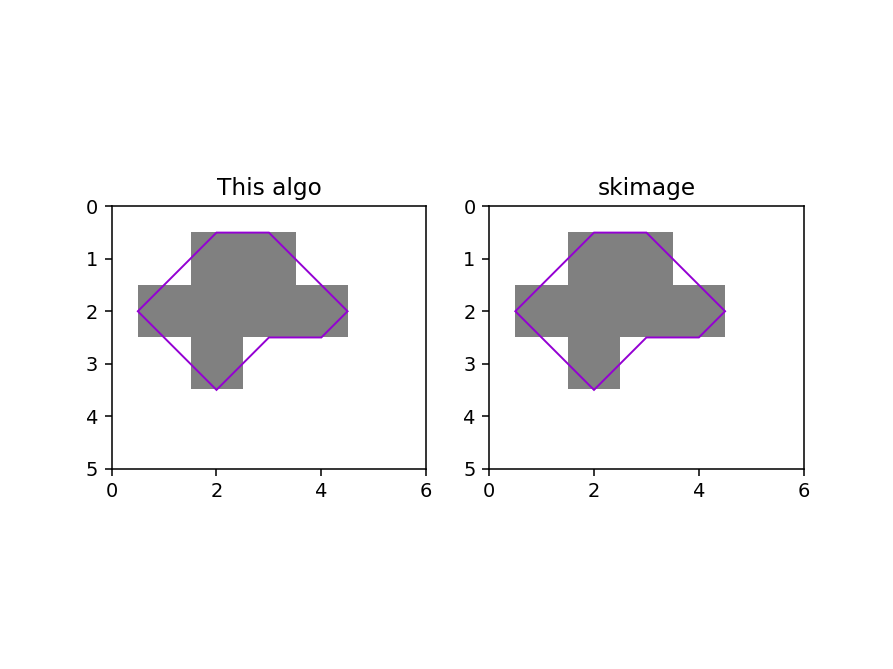

In [17]:
image = numpy.array([[0, 0, 0, 0, 0, 0],
                     [0, 0, 1, 1, 0, 0],
                     [0, 1, 1, 1, 1, 0],
                     [0, 0, 1, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0]], dtype=numpy.float32)

algo = ThisMarchingSquare(image, openmp_group_size=3)
show_test(image, algo=algo)

Test
=================

In [18]:
problem = benchmark_utils.create_test_problem()
print("Without mask + without minmax")
marching_square = MarchingSquareCythonInsertOpenMp(problem.image)
%timeit [marching_square.iso_contour(a) for a in problem.values]
marching_square = ThisMarchingSquare(problem.image)
%timeit [marching_square.iso_contour(a) for a in problem.values]
print("Without mask + with minmax")
factory = lambda: MarchingSquareCythonInsertOpenMp(problem.image, use_minmax_cache=True)
%timeit marching_square = factory(); [marching_square.iso_contour(a) for a in problem.values]
factory = lambda: ThisMarchingSquare(problem.image, use_minmax_cache=True)
%timeit marching_square = factory(); [marching_square.iso_contour(a) for a in problem.values]

Without mask + without minmax
19.8 ms ± 1.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
18.3 ms ± 1.05 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
Without mask + with minmax
23.7 ms ± 1.84 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
20.4 ms ± 613 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


<IPython.core.display.Javascript object>


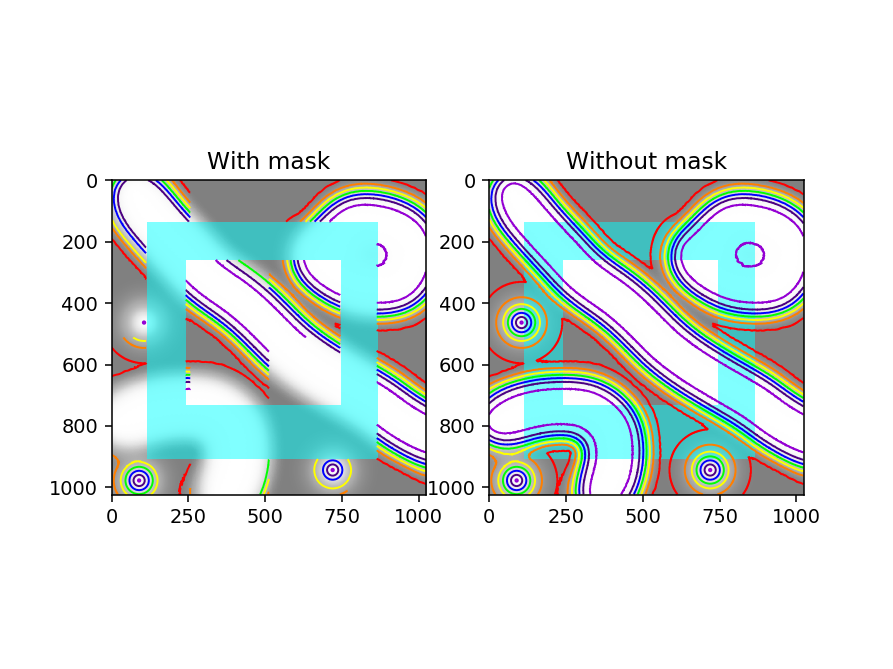

In [36]:
problem = benchmark_utils.create_test_problem()
show_test_mask(problem)

Test synthetic image
===========

<IPython.core.display.Javascript object>


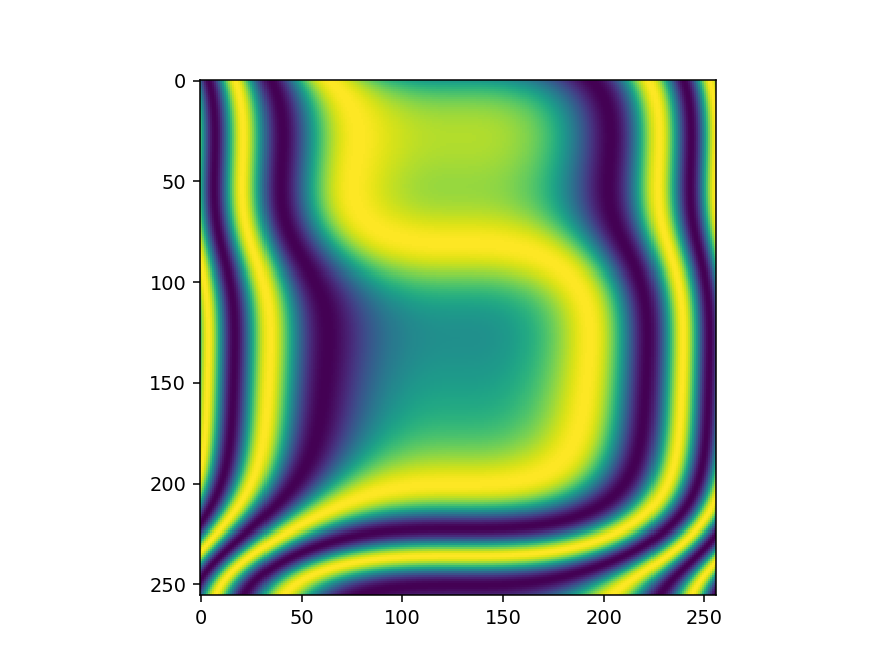

In [24]:
def create_data(size):
    half = size // 2
    y, x = numpy.ogrid[-half:half, -half:half]
    coef = 1 / half
    y, x = y * coef, x * coef
    data = x*x + y*y
    data = x*x*(x*2) + y*y/2**numpy.sin(y*5)
    data = numpy.sin(data * 6, dtype=numpy.float32)
    return data

problem = benchmark_utils.Problem(create_data(256))
benchmark_utils.show_problems([problem])

<IPython.core.display.Javascript object>


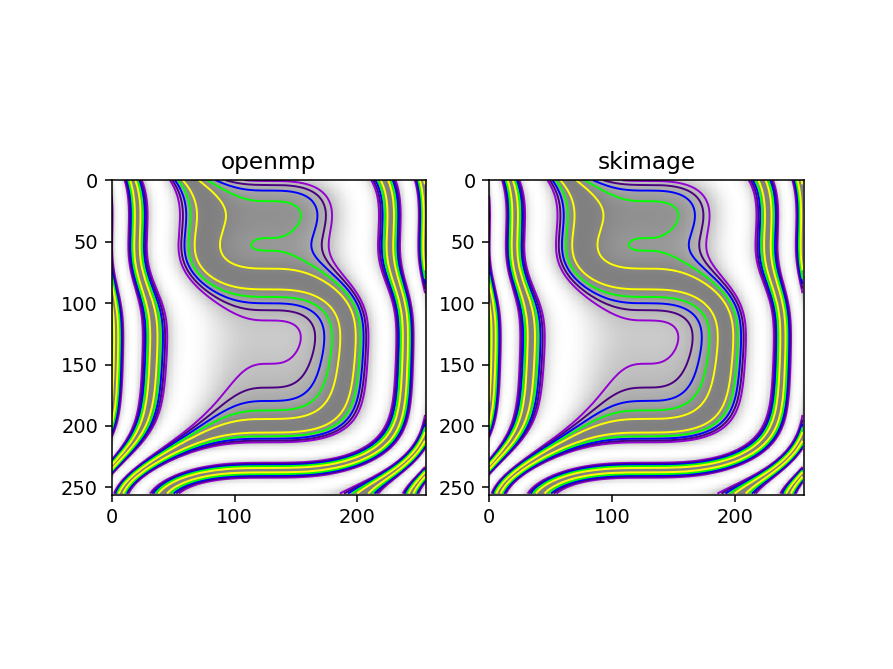

In [25]:
from matplotlib import pyplot
pyplot.figure()
pyplot.subplot(121)
pyplot.title("openmp")
marching_square = ThisMarchingSquare(problem.image, problem.mask)
benchmark_utils.imshow_problem(problem, marching_square)
pyplot.subplot(122)
pyplot.title("skimage")
marching_square = MarchingSquareSciKitImage(problem.image, problem.mask)
benchmark_utils.imshow_problem(problem, marching_square)
pyplot.show()

WOS detector (700K pixels)
==========================

In [19]:
problem = benchmark_utils.create_wos_problem()
print("With mask")
factory = lambda: MarchingSquareCythonInsertOpenMp(problem.image, problem.mask)
%timeit marching_square = factory(); [marching_square.iso_contour(a) for a in problem.values]
factory = lambda: ThisMarchingSquare(problem.image, problem.mask)
%timeit marching_square = factory(); [marching_square.iso_contour(a) for a in problem.values]
print("Without mask")
factory = lambda: MarchingSquareCythonInsertOpenMp(problem.image)
%timeit marching_square = factory(); [marching_square.iso_contour(a) for a in problem.values]
factory = lambda: ThisMarchingSquare(problem.image)
%timeit marching_square = factory(); [marching_square.iso_contour(a) for a in problem.values]
print("Without mask + with minmax")
factory = lambda: MarchingSquareCythonInsertOpenMp(problem.image, use_minmax_cache=True)
%timeit marching_square = factory(); [marching_square.iso_contour(a) for a in problem.values]
factory = lambda: ThisMarchingSquare(problem.image, use_minmax_cache=True)
%timeit marching_square = factory(); [marching_square.iso_contour(a) for a in problem.values]

With mask
18.2 ms ± 1.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
13.8 ms ± 96.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Without mask
26.3 ms ± 514 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
24.2 ms ± 1.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Without mask + with minmax
24.6 ms ± 707 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
22.6 ms ± 1.79 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<IPython.core.display.Javascript object>


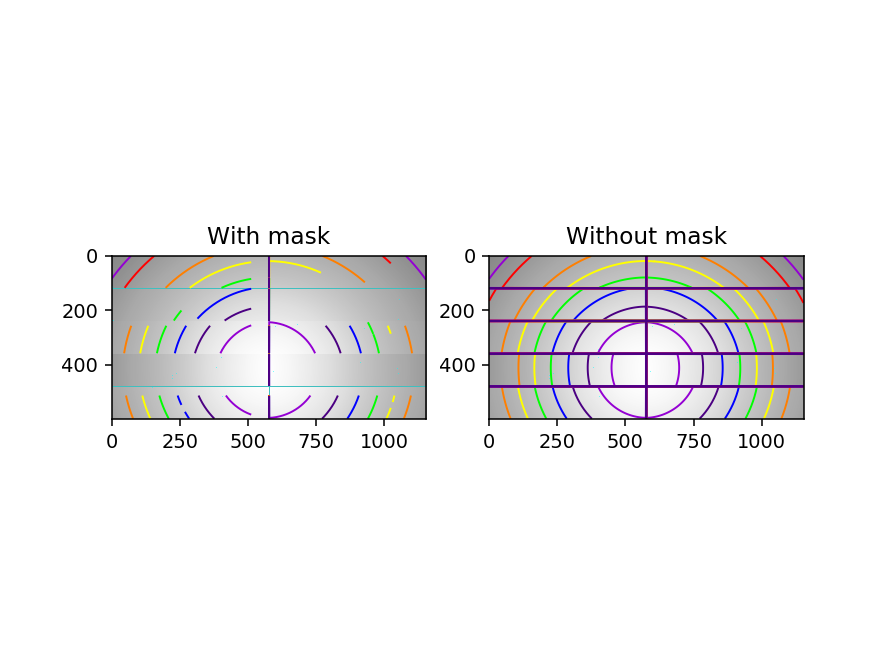

In [20]:
problem = benchmark_utils.create_wos_problem()
show_test_mask(problem)

Perkin Elmer (16M pixels)
=========================

In [21]:
problem = benchmark_utils.create_id22_17_problem()
print("With mask")
factory = lambda: MarchingSquareCythonInsertOpenMp(problem.image, problem.mask)
%timeit marching_square = factory(); [marching_square.iso_contour(a) for a in problem.values]
factory = lambda: ThisMarchingSquare(problem.image, problem.mask)
%timeit marching_square = factory(); [marching_square.iso_contour(a) for a in problem.values]
print("Without mask")
factory = lambda: MarchingSquareCythonInsertOpenMp(problem.image)
%timeit marching_square = factory(); [marching_square.iso_contour(a) for a in problem.values]
factory = lambda: ThisMarchingSquare(problem.image)
%timeit marching_square = factory(); [marching_square.iso_contour(a) for a in problem.values]
print("Without mask + with minmax")
factory = lambda: MarchingSquareCythonInsertOpenMp(problem.image, use_minmax_cache=True)
%timeit marching_square = factory(); [marching_square.iso_contour(a) for a in problem.values]
factory = lambda: ThisMarchingSquare(problem.image, use_minmax_cache=True)
%timeit marching_square = factory(); [marching_square.iso_contour(a) for a in problem.values]

With mask
334 ms ± 3.83 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
330 ms ± 6.23 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Without mask
281 ms ± 4.56 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
285 ms ± 5.45 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Without mask + with minmax
249 ms ± 13.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
256 ms ± 16.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<IPython.core.display.Javascript object>


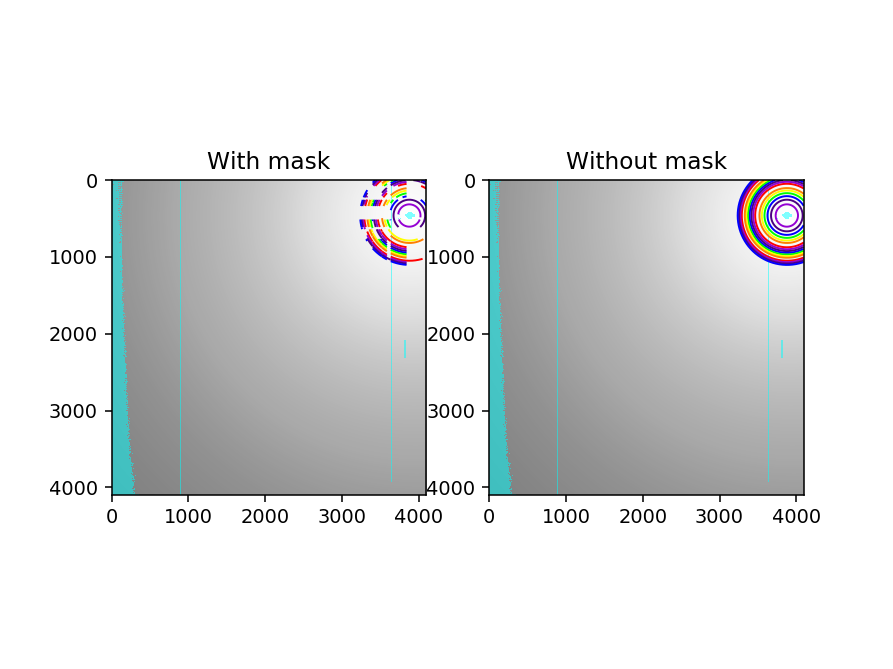

In [22]:
problem = benchmark_utils.create_id22_17_problem()
show_test_mask(problem)

<IPython.core.display.Javascript object>


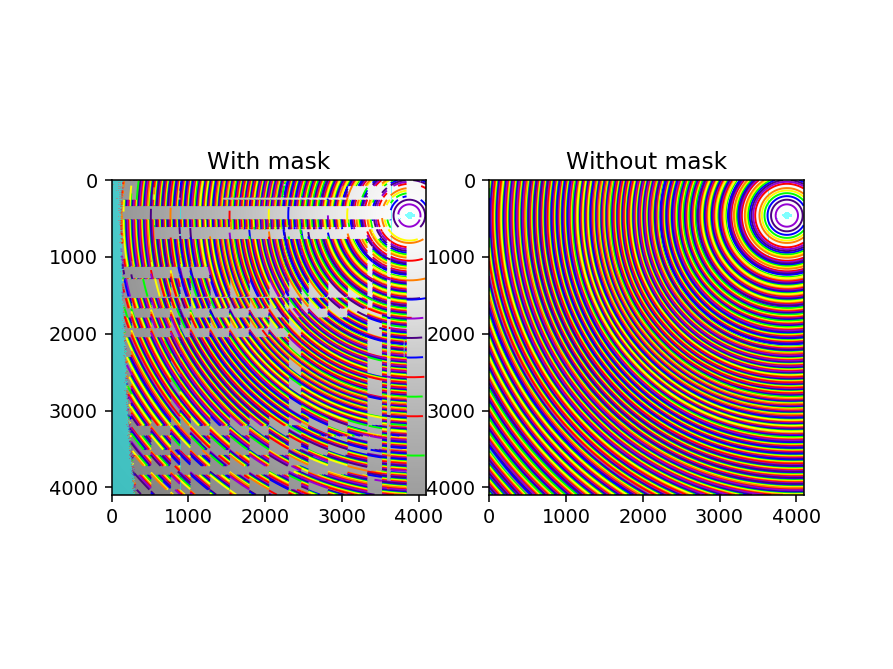

In [24]:
problem = benchmark_utils.create_id22_1441_problem()
show_test_mask(problem)

In [25]:
problem = benchmark_utils.create_id22_1441_problem()
# print("skimage")
# %timeit marching_square = MarchingSquareSciKitImage(problem.image, problem.mask); [marching_square.iso_contour(a) for a in problem.values]
# print("Array")
# %timeit marching_square = MarchingSquareCythonArrayOpt(problem.image, problem.mask); [marching_square.iso_contour(a) for a in problem.values]
print("With mask")
factory = lambda: MarchingSquareCythonInsertOpenMp(problem.image, problem.mask)
%timeit marching_square = factory(); [marching_square.iso_contour(a) for a in problem.values]
factory = lambda: ThisMarchingSquare(problem.image, problem.mask)
%timeit marching_square = factory(); [marching_square.iso_contour(a) for a in problem.values]
print("Without mask")
factory = lambda: MarchingSquareCythonInsertOpenMp(problem.image)
%timeit marching_square = factory(); [marching_square.iso_contour(a) for a in problem.values]
factory = lambda: ThisMarchingSquare(problem.image)
%timeit marching_square = factory(); [marching_square.iso_contour(a) for a in problem.values]
print("Without mask + with minmax")
factory = lambda: MarchingSquareCythonInsertOpenMp(problem.image, use_minmax_cache=True)
%timeit marching_square = factory(); [marching_square.iso_contour(a) for a in problem.values]
factory = lambda: ThisMarchingSquare(problem.image, use_minmax_cache=True)
%timeit marching_square = factory(); [marching_square.iso_contour(a) for a in problem.values]

With mask
6.4 s ± 94.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
6.12 s ± 12.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Without mask
5.34 s ± 81.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.34 s ± 31.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Without mask + with minmax
2.47 s ± 18.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.36 s ± 23.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
